### <font color='red'> Project 2 : Buzz Prediction on Twitter

Project Description:
- There are two different datasets for Regression and Classification tasks. Right-most column in both the datasets is a dependent variable i.e. buzz.
- Data description files are also provided for both the datasets.
- Deciding which dataset is for which task is part of the project.
- Read data into Jupyter notebook, use pandas to import data into a data frame.
- Preprocess data: Explore data, check for missing data and apply data scaling. Justify the type of scaling used.

Regression Task:
- Apply all the regression models you've learned so far. If your model has a scaling parameter(s) use Grid Search to find the best scaling parameter. Use plots and graphs to help you get a better glimpse of the results. 
- Then use cross-validation to find average training and testing score. 
- Your submission should have at least the following regression models: KNN regressor, linear regression, Ridge, Lasso, polynomial regression, SVM both simple and with kernels. 
- Finally, find the best regressor for this dataset and train your model on the entire dataset using the best parameters and predict buzz for the test_set.

Classification Task:
- Decide about a good evaluation strategy and justify your choice.
- Find best parameters for the following classification models: KNN classification, Logistic Regression, Linear Support Vector Machine, Kernelized Support Vector Machine, Decision Tree. 
- Which model gives the best results?

Deliverables:
- Submit IPython notebook. Use markdown to provide inline comments for this project.
- Rename notebook with your group number and submit only one notebook. Before submitting, make sure everything runs as expected. To check that, restart the kernel (in the menubar, select Kernel > Restart) and then run all cells (in the menubar, select Cell > Run All).
- Visualization encouraged.

Questions regarding the project:
- We have created a discussion board under Projects folder on e-learning. Create threads over there and post your queries related to project there.
- There is a high possibility that your classmate has also faced the same problem and knows the solution. So this is an effort to encourage collaborative learning, reducing mails for frequently asked queries and also making all the information available to everyone.
- Please check existing threads for your query before creating a new one. It goes without saying that do not share your code or complete solutions there.
- We will also answer queries there. We will not be answering any project related queries through the mail.

In [1]:
import numpy as np

In [2]:
# ncd = number of discussions created at time step t
# ai = new authors interacting on the instance's topic at time t
# as(NA) = instance topic on a social media.
# bl = The burstiness level for a topic z at a time t is defined as the ratio of ncd and nad
# Number of Atomic Containers (NAC)
# Attention Level (measured with number of contributions) (AS(NAC))
# This feature is a measure of spreading of contributions over discussion for the instance's topic at time t. (cs_)  
# measures the average number of authors interacting on the instance's topic within a discussion. (AT_)
# measures the number of authors interacting on the instance's topic at time t. (NA_)
# measures the average length of a discussion belonging to the instance's topic. (ADL_)
# measures the number of discussions involving the instance's topic until time t. (NAD_)

sfx = np.array(['NCD_', 'AI_', 'AS(NA)_', 'BL_', 'NAC_', 'AS(NAC)_', 'CS_', 'AT_', 'NA_','ADL_', 'NAD_' ])

col = np.array([])
for j in sfx:
    for i in range(7):
        a = str(j) + str(i)
        col = np.append(col, [a])
col = np.append(col, ['out'])

print(col)

['NCD_0' 'NCD_1' 'NCD_2' 'NCD_3' 'NCD_4' 'NCD_5' 'NCD_6' 'AI_0' 'AI_1'
 'AI_2' 'AI_3' 'AI_4' 'AI_5' 'AI_6' 'AS(NA)_0' 'AS(NA)_1' 'AS(NA)_2'
 'AS(NA)_3' 'AS(NA)_4' 'AS(NA)_5' 'AS(NA)_6' 'BL_0' 'BL_1' 'BL_2' 'BL_3'
 'BL_4' 'BL_5' 'BL_6' 'NAC_0' 'NAC_1' 'NAC_2' 'NAC_3' 'NAC_4' 'NAC_5'
 'NAC_6' 'AS(NAC)_0' 'AS(NAC)_1' 'AS(NAC)_2' 'AS(NAC)_3' 'AS(NAC)_4'
 'AS(NAC)_5' 'AS(NAC)_6' 'CS_0' 'CS_1' 'CS_2' 'CS_3' 'CS_4' 'CS_5' 'CS_6'
 'AT_0' 'AT_1' 'AT_2' 'AT_3' 'AT_4' 'AT_5' 'AT_6' 'NA_0' 'NA_1' 'NA_2'
 'NA_3' 'NA_4' 'NA_5' 'NA_6' 'ADL_0' 'ADL_1' 'ADL_2' 'ADL_3' 'ADL_4'
 'ADL_5' 'ADL_6' 'NAD_0' 'NAD_1' 'NAD_2' 'NAD_3' 'NAD_4' 'NAD_5' 'NAD_6'
 'out']


In [4]:
cd C:\Users\satwi\OneDrive\Desktop\New folder

C:\Users\satwi\OneDrive\Desktop\New folder


In [3]:
import pandas as pd

data = pd.read_csv("Twitter.data", header=None, names = col)

In [4]:
data.head()

,NCD_0,NCD_1,NCD_2,NCD_3,NCD_4,NCD_5,NCD_6,AI_0,AI_1,AI_2,...,ADL_5,ADL_6,NAD_0,NAD_1,NAD_2,NAD_3,NAD_4,NAD_5,NAD_6,out
0,0,2,0,0,1,1,1,0,1,0,...,1.0,1.0,0,2,0,0,1,1,1,0.0
1,2,1,0,0,0,0,4,2,1,0,...,0.0,1.0,2,1,0,0,0,0,4,0.5
2,1,0,0,0,0,4,1,1,0,0,...,1.0,1.0,1,0,0,0,0,4,1,0.0
3,1,0,0,1,0,0,1,1,0,0,...,0.0,1.0,1,0,0,1,0,0,1,2.5
4,0,1,0,0,1,2,3,0,1,0,...,1.0,1.0,0,1,0,0,1,2,3,0.5


In [9]:
df = data.sum(axis= 0)
df.head(10)

NCD_0     81853095.0
NCD_1     79771188.0
NCD_2     93132935.0
NCD_3    105913587.0
NCD_4    117290085.0
NCD_5    128417285.0
NCD_6    127958176.0
AI_0      41432943.0
AI_1      40728132.0
AI_2      47942102.0
dtype: float64

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

dl = {}
for i in range(0,7):
    dl[i] = (i+1,df[i])
    plt.show()

In [7]:
data.shape

(583250, 78)

In [8]:
data.out.unique()

array([  0.00000000e+00,   5.00000000e-01,   2.50000000e+00, ...,
         4.96000000e+03,   4.61850000e+03,   2.12950000e+03])

In [9]:
tas_data = pd.read_csv("Twitter-Absolute-Sigma-500.data.", header = None, names = col)

In [10]:
tas_data.head()

,NCD_0,NCD_1,NCD_2,NCD_3,NCD_4,NCD_5,NCD_6,AI_0,AI_1,AI_2,...,ADL_5,ADL_6,NAD_0,NAD_1,NAD_2,NAD_3,NAD_4,NAD_5,NAD_6,out
0,889,939,960,805,805,1143,1121,549,613,587,...,1.0,1.0,889,939,960,805,805,1143,1121,1.0
1,542,473,504,626,647,795,832,366,288,318,...,1.0,1.0,542,473,504,626,647,795,832,1.0
2,92,99,196,100,184,79,162,66,59,118,...,1.0,1.0,92,99,196,100,184,79,162,0.0
3,90,87,92,344,184,848,184,83,78,76,...,1.0,1.0,90,87,92,344,184,848,184,1.0
4,169,98,101,90,96,95,185,141,68,85,...,1.0,1.0,169,98,101,90,96,95,185,1.0


In [11]:
tas_data.shape

(140707, 78)

In [12]:
tas_data.out.unique()

array([ 1.,  0.])

# Deciding which dataset is for which task is part of the project.
#### - The data set twitter.data is used for regression because the output values are continous variables
#### - The data set twitter-Absolute-Sigma-500.data for classification because the output values are (1 or 0) categorical variables

In [13]:
data.describe()

,NCD_0,NCD_1,NCD_2,NCD_3,NCD_4,NCD_5,NCD_6,AI_0,AI_1,AI_2,...,ADL_5,ADL_6,NAD_0,NAD_1,NAD_2,NAD_3,NAD_4,NAD_5,NAD_6,out
count,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,...,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000
mean,140.339640,136.770147,159.679271,181.592091,201.097445,220.175371,219.388214,71.038051,69.829631,82.198203,...,1.136688,1.140372,140.789860,137.181270,160.105922,182.057440,201.596482,220.705900,219.936864,191.279493
std,431.772639,432.305129,502.057428,574.883713,630.448432,669.205930,672.182204,196.876718,202.199758,239.523042,...,1.432327,1.552313,432.624954,433.026611,502.774408,575.658022,631.258318,670.050977,673.032541,612.352354
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,4.000000,4.000000,5.000000,6.000000,6.000000,2.000000,2.000000,2.000000,...,1.000000,1.000000,3.000000,3.000000,4.000000,4.000000,5.000000,6.000000,6.000000,4.500000
50%,18.000000,17.000000,21.000000,24.000000,27.000000,31.000000,30.000000,11.000000,11.000000,13.000000,...,1.000000,1.000000,18.000000,17.000000,21.000000,24.000000,27.000000,31.000000,31.000000,25.500000
75%,104.000000,100.000000,115.000000,131.000000,147.000000,166.000000,164.000000,59.000000,57.000000,65.000000,...,1.090909,1.091296,104.000000,101.000000,115.000000,131.000000,148.000000,167.000000,165.000000,139.000000
max,24210.000000,29574.000000,37505.000000,72366.000000,79079.000000,79079.000000,79079.000000,18654.000000,22035.000000,29402.000000,...,262.000000,295.000000,24301.000000,29574.000000,37505.000000,72366.000000,79083.000000,79083.000000,79083.000000,75724.500000


In [14]:
tas_data.describe()

,NCD_0,NCD_1,NCD_2,NCD_3,NCD_4,NCD_5,NCD_6,AI_0,AI_1,AI_2,...,ADL_5,ADL_6,NAD_0,NAD_1,NAD_2,NAD_3,NAD_4,NAD_5,NAD_6,out
count,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,...,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000
mean,172.279823,155.150625,165.464476,176.820549,186.937700,216.209208,243.866510,87.050154,78.639236,84.269574,...,1.113444,1.196131,172.838807,155.630878,165.938674,177.314810,187.463794,216.776294,244.479194,0.197396
std,509.872276,471.573236,495.360236,528.351277,560.331281,632.188378,707.402192,234.731748,218.448179,233.536510,...,1.374287,1.826150,510.937549,472.462733,496.233557,529.286514,561.309487,633.203935,708.436795,0.398035
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,3.000000,3.000000,3.000000,4.000000,5.000000,2.000000,2.000000,2.000000,...,1.000000,1.000000,3.000000,2.000000,3.000000,3.000000,3.000000,4.000000,6.000000,0.000000
50%,22.000000,19.000000,20.000000,22.000000,23.000000,28.000000,33.000000,13.000000,11.000000,13.000000,...,1.000000,1.000000,22.000000,19.000000,21.000000,22.000000,23.000000,28.000000,33.000000,0.000000
75%,125.000000,112.000000,119.000000,126.000000,133.000000,161.000000,186.000000,70.000000,64.000000,67.000000,...,1.100000,1.119048,126.000000,113.000000,119.000000,127.000000,134.000000,162.000000,187.000000,0.000000
max,24210.000000,22899.000000,20495.000000,27007.000000,30957.000000,28603.000000,37505.000000,15105.000000,15730.000000,16389.000000,...,185.666672,295.000000,24301.000000,22980.000000,20495.000000,27071.000000,31028.000000,28697.000000,37505.000000,1.000000


# EDA of twitter.data

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

In [16]:
tas_data.groupby('out').size()

out
0.0    112932
1.0     27775
dtype: int64

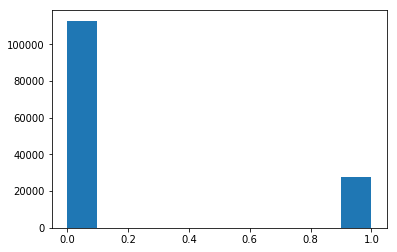

In [17]:
plt.hist(tas_data.out)
plt.show()

# Checking for null Values
## from below it is clear that there are no null values in both the data sets

In [24]:
data.isnull().any().any()

False

In [26]:
tas_data.isnull().any().any()

False

# Regression

In [88]:
# to decrease the size of the dataset

from sklearn.model_selection import train_test_split

_, sample_data, _, sample_target = train_test_split(data.iloc[:,0:76],data.iloc[:,77], shuffle = True, test_size = 0.1)

In [89]:
# Stratified random sampling

from sklearn.model_selection import train_test_split

X_train_r, X_test_r, Y_train_r, Y_test_r = train_test_split(sample_data,sample_target,
                                                   random_state = 1)
print("X_train shape = "+ str(X_train_r.shape))
print("X_test shape = "+ str(X_test_r.shape))
print("Y_train shape = "+ str(Y_train_r.shape))
print("Y_test shape = "+ str(Y_test_r.shape))


X_train shape = (43743, 76)
X_test shape = (14582, 76)
Y_train shape = (43743,)
Y_test shape = (14582,)


# Linear Regression

In [73]:
n

0.933523438076


# KNN Regressor

In [16]:
from sklearn.neighbors import KNeighborsRegressor

knn_reg = KNeighborsRegressor()
                                                                                                                                                                                                                                
params = {'n_neighbors': [3,5,7,9], 
          'weights': ['uniform','distance'],
         'p': [1,2]}

model1 = GridSearchCV(knn_reg, param_grid=params)

model1.fit(X_train_r,Y_train_r)

print("tuned hyperparameters :(best parameters) ",model1.best_params_)
print("accuracy :",model1.best_score_)

tuned hpyerparameters :(best parameters)  {'n_neighbors': 3, 'p': 2, 'weights': 'distance'}
accuracy : 0.8575045040434767


F:\Newfolder\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


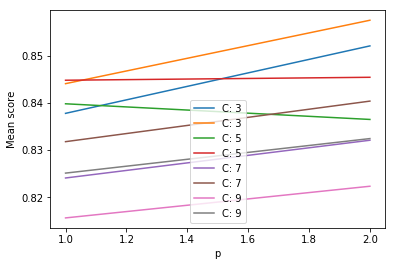

In [37]:
scores = [x[1] for x in model1.grid_scores_]
scores = np.array(scores).reshape(4,2,2)

for ind, i in enumerate(params['n_neighbors']):
    plt.plot(params['p'], scores[ind], label='C: ' + str(i))
plt.legend()
plt.xlabel('p')
plt.ylabel('Mean score')
plt.show()

# Ridge

In [39]:
from sklearn.linear_model import Ridge

ridge = Ridge()
params = {'alpha': [0.01, 0.1, 1, 10],'max_iter': [10000,50000,100000]}

model1 = GridSearchCV(ridge, param_grid=params)

model1.fit(X_train_r,Y_train_r)

print("tuned hyperparameters :(best parameters) ",model1.best_params_)
print("accuracy :",model1.best_score_)

tuned hpyerparameters :(best parameters)  {'alpha': 0.01, 'max_iter': 80000}
accuracy : 0.9453916598825639


F:\Newfolder\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


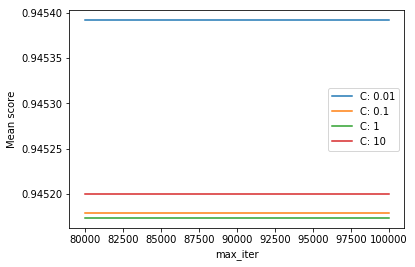

In [40]:
scores = [x[1] for x in model1.grid_scores_]
scores = np.array(scores).reshape(4,3)

for ind, i in enumerate(params['alpha']):
    plt.plot(params['max_iter'], scores[ind], label='C: ' + str(i))
plt.legend()
plt.xlabel('max_iter')
plt.ylabel('Mean score')
plt.show()

# Lasso

In [13]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

lasso = Lasso()
params = {'alpha': [1000, 10000, 50000,100000],
         'max_iter': [80000,90000,100000]}

model1 = GridSearchCV(lasso, param_grid=params)

model1.fit(X_train_r,Y_train_r)

print("tuned hyperparameters :(best parameters) ",model1.best_params_)
print("accuracy :",model1.best_score_)


tuned hpyerparameters :(best parameters)  {'alpha': 1000, 'max_iter': 80000}
accuracy : 0.9411606852710185


F:\Newfolder\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


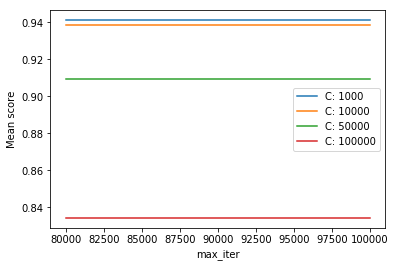

In [14]:
scores = [x[1] for x in model1.grid_scores_]
scores = np.array(scores).reshape(4,3)

for ind, i in enumerate(params['alpha']):
    plt.plot(params['max_iter'], scores[ind], label='C: ' + str(i))
plt.legend()
plt.xlabel('max_iter')
plt.ylabel('Mean score')
plt.show()

# Polynomial Features

In [72]:
from  sklearn.preprocessing  import PolynomialFeatures
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()

train_score_list = []
test_score_list = []

for n in range(1,4):
    poly = PolynomialFeatures(n)
    X_train_poly = poly.fit_transform(X_train_r)
    X_test_poly = poly.transform(X_test_r)
    lreg.fit(X_train_poly, Y_train_r)
    train_score_list.append(lreg.score(X_train_poly, Y_train_r))
    test_score_list.append(lreg.score(X_test_poly, Y_test_r))
print(train_score_list)
print(test_score_list)

[0.97029190181791214, 0.99704464606998056, 0.99999993754108862]
[0.95622991726108053, -4749.3179162699125, -92701183364.083237]


##### We can infer from the above results that n=1 is the only viable parameter and when n=1, it is nothing but linear regression.

# Simple SVM Regressor

In [86]:
from sklearn.svm import SVR

svr = SVR()
params = {'degree': [3,4]}

model1 = GridSearchCV(svr, param_grid=params)

model1.fit(X_train,Y_train)

print("tuned hyperparameters :(best parameters) ",model1.best_params_)
print("accuracy :",model1.best_score_)

tuned hyperparameters :(best parameters)  {'degree': 3}
accuracy :0.83568545854585658


# Kernalized SVM

In [87]:
from sklearn.svm import SVR

svr = SVR()
params = {'degree': [3,4], 
          'kernel': ['sigmoid']}

model1 = GridSearchCV(svr, param_grid=params)

model1.fit(X_train,Y_train)

print("tuned hyperparameters :(best parameters) ",model1.best_params_)
print("accuracy :",model1.best_score_)

tuned hyperparameters :(best parameters)  {'degree': 3, 'kernel': 'sigmoid'}
accuracy :0.89235845785896589


## From the above models linear regression is the one with best accuracy. So we run Linear regression on the entire data

In [104]:
from sklearn.linear_model import LinearRegression

X_train_krl, X_test_krl, Y_train_krl, Y_test_krl = train_test_split(data.iloc[:,0:76],data.iloc[:,77], shuffle = True)

lreg = LinearRegression()
model1 = lreg.fit(X_train_krl, Y_train_krl)
model1.score(X_test_krl, Y_test_krl)

0.91022455467641461

# Classification

In [106]:
# to decrease the size of the dataset

from sklearn.model_selection import train_test_split

_, sample_data, _, sample_target = train_test_split(tas_data.iloc[:,0:76],tas_data.iloc[:,77], shuffle = True, test_size = 0.1)

In [108]:
sample_target.groupby(sample_target).size()

out
0.0    11323
1.0     2748
Name: out, dtype: int64

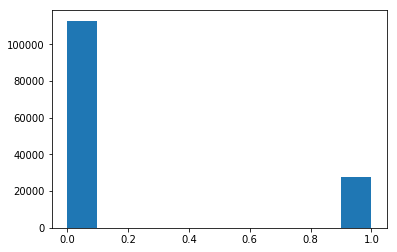

In [110]:
plt.hist(tas_data.out)
plt.show()

In [112]:
# Stratified random sampling

from sklearn.model_selection import train_test_split

X_train_unscaled, X_test_unscaled, Y_train, Y_test = train_test_split(sample_data,sample_target,
                                                   stratify = sample_target, random_state = 1)
print("X_train_unscaled shape = "+ str(X_train.shape))
print("X_test_unscaled shape = "+ str(X_test.shape))
print("Y_train shape = "+ str(Y_train.shape))
print("Y_test shape = "+ str(Y_test.shape))


X_train_unscaled shape = (10553, 76)
X_test_unscaled shape = (3518, 76)
Y_train shape = (10553,)
Y_test shape = (3518,)


In [114]:
train_counts = np.unique(Y_train, return_counts = True)
print('percentage of no buzz in train is ' + str(train_counts[1][0]*100/(train_counts[1][0]+train_counts[1][1])))
print('percentage of buzz in train is ' + str(train_counts[1][1]*100/(train_counts[1][0]+train_counts[1][1])))

test_counts = np.unique(Y_test, return_counts = True)
print('percentage of no buzz in test is ' + str(test_counts[1][0]*100/(test_counts[1][0]+test_counts[1][1])))
print('percentage of buzz in ttest is ' + str(test_counts[1][1]*100/(test_counts[1][0]+test_counts[1][1])))

percentage of no buzz in train is 80.4700085284
percentage of buzz in train is 19.5299914716
percentage of no buzz in test is 80.4718590108
percentage of buzz in ttest is 19.5281409892


In [124]:
# Re-scaling the data so that all featurs are approximately on the same scale
# Here we used standard scaler because the features have no hard boundaries here and the data is zerocentric 
from sklearn.preprocessing import StandardScaler

s = StandardScaler()
X_train = s.fit_transform(X_train_unscaled)
X_train
X_test = s.fit_transform(X_test_unscaled)

In [116]:
# import metric : roc_auc_score

from sklearn.metrics import roc_auc_score

In [118]:
# import GridSearchCV 

from sklearn.model_selection import GridSearchCV

# KNN

In [133]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
param_grid = {'n_neighbors':[1,  5, 10,  20]}

grid_knn = GridSearchCV(knn, param_grid=param_grid, cv = 5, scoring='roc_auc')
grid_knn.fit(X_train, Y_train.values.ravel())
grid_knn.score(X_train, Y_train.values.ravel())

0.99371258001651475

In [134]:
grid_knn.score(X_test, Y_test)

0.98642653055663099

In [135]:
grid_knn.best_params_

{'n_neighbors': 20}

In [136]:
grid_knn.cv_results_['mean_test_score']

array([ 0.9181201 ,  0.97212123,  0.98087492,  0.98374684])

In [137]:
y_knn_predict = grid_knn.predict(X_test)
y_knn_train_predict = grid_knn.predict(X_train)

In [138]:
from sklearn.metrics import roc_auc_score
print('Train roc_auc_score: %.2f'%roc_auc_score(y_knn_train_predict, Y_train))
print('Test roc_auc_score: %.2f '%roc_auc_score(y_knn_predict, Y_test))

Train roc_auc_score: 0.95
Test roc_auc_score: 0.95 


In [193]:
summary_table = [['knn', 'n_neighbors = 20',
                 grid_knn.score(X_train, Y_train), grid_knn.score(X_test, Y_test), 
                 roc_auc_score(y_knn_train_predict, Y_train), roc_auc_score(y_knn_predict, Y_test) ]]

# Logistic

In [144]:
from sklearn.linear_model import LogisticRegression

logr = LogisticRegression()
param_grid = {'C':[0.001, 0.1, 1,  100, 1000]}

grid_log = GridSearchCV(logr, param_grid=param_grid, cv = 5, scoring='roc_auc')
grid_log.fit(X_train, Y_train.values.ravel())
grid_log.score(X_train, Y_train.values.ravel())


0.99194572601138664

In [145]:
grid_log.score(X_test, Y_test)

0.9909851267187928

In [146]:
grid_log.best_params_

{'C': 1}

In [147]:
grid_log.cv_results_['mean_test_score']

array([ 0.989179  ,  0.99126164,  0.99144113,  0.98994848,  0.98977578])

In [148]:
y_log_predict = grid_log.predict(X_test)
y_log_train_predict = grid_log.predict(X_train)

In [150]:
from sklearn.metrics import roc_auc_score
print('Train roc_auc_score: %.2f'%roc_auc_score(y_log_train_predict, Y_train))
print('Test roc_auc_score: %.2f '%roc_auc_score(y_log_predict, Y_test))

Train roc_auc_score: 0.95
Test roc_auc_score: 0.96 


In [194]:
summary_table = summary_table + [['log', 'C = 1', grid_log.score(X_train, Y_train), grid_log.score(X_test, Y_test), roc_auc_score(y_log_train_predict, Y_train), roc_auc_score(y_log_predict, Y_test) ]]

# Linear SVM

In [154]:
from sklearn.svm import LinearSVC

svc_lin = LinearSVC()
param_grid = {'C':[ 0.01, 0.1, 1, 10, 100]}

grid_svc_lin = GridSearchCV(svc_lin, param_grid, cv = 5, scoring='roc_auc', return_train_score=True)
grid_svc_lin.fit(X_train, Y_train.values.ravel())
grid_svc_lin.score(X_train, Y_train.values.ravel())

0.99099852062722837

In [156]:
grid_svc_lin.score(X_test, Y_test)

0.99030745587041358

In [157]:
grid_svc_lin.best_params_

{'C': 0.01}

In [158]:
grid_svc_lin.cv_results_['mean_test_score']

array([ 0.99070623,  0.99062467,  0.98951962,  0.98924561,  0.98291567])

In [159]:
y_svc_lin_predict = grid_svc_lin.predict(X_test)
y_svc_lin_train_predict = grid_svc_lin.predict(X_train)

In [160]:
from sklearn.metrics import roc_auc_score
print('Train roc_auc_score: %.2f'%roc_auc_score(y_svc_lin_train_predict, Y_train))
print('Test roc_auc_score: %.2f '%roc_auc_score(y_svc_lin_predict, Y_test))

Train roc_auc_score: 0.96
Test roc_auc_score: 0.95 


In [195]:
summary_table = summary_table + [['Linear SVM', 'C = 0.01', grid_svc_lin.score(X_train, Y_train), grid_svc_lin.score(X_test, Y_test), roc_auc_score(y_svc_lin_train_predict, Y_train), roc_auc_score(y_svc_lin_predict, Y_test) ]]

# Kernalized SVM

In [163]:
from sklearn.svm import SVC

ksvc = SVC(kernel = 'sigmoid')
print(ksvc)
param_grid = {'C':[ 0.01, 0.1, 1, 10, 100]}
grid_ksvc = GridSearchCV(ksvc, param_grid, cv = 5, scoring='roc_auc', return_train_score=True)
grid_ksvc.fit(X_train, Y_train.values.ravel())
grid_ksvc.score(X_train, Y_train.values.ravel())

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='sigmoid',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


0.98891693137908931

In [165]:
grid_ksvc.score(X_test, Y_test)

0.98936087618007529

In [167]:
grid_ksvc.best_params_

{'C': 0.01}

In [168]:
grid_ksvc.cv_results_['mean_test_score']

array([ 0.98893154,  0.97531734,  0.97011146,  0.96991495,  0.96990953])

In [169]:
y_ksvc_predict = grid_ksvc.predict(X_test)
y_ksvc_train_predict = grid_ksvc.predict(X_train)

In [171]:
from sklearn.metrics import roc_auc_score
print('Train roc_auc_score: %.2f'%roc_auc_score(y_ksvc_train_predict, Y_train))
print('Test roc_auc_score: %.2f '%roc_auc_score(y_ksvc_predict, Y_test))

Train roc_auc_score: 0.95
Test roc_auc_score: 0.95 


In [196]:
summary_table = summary_table + [['Kernalized SVM', 'C = 0.01', grid_ksvc.score(X_train, Y_train), grid_ksvc.score(X_test, Y_test), roc_auc_score(y_ksvc_train_predict, Y_train), roc_auc_score(y_ksvc_predict, Y_test) ]]

# Decision tree

In [174]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(random_state=0)
param_grid = {'max_depth':[1, 3, 4, 5, 7, 8]}
grid_dtree = GridSearchCV(dtree, param_grid, cv = 5, scoring='roc_auc', return_train_score=True)
grid_dtree.fit(X_train, Y_train)
grid_dtree.score(X_train, Y_train)

0.98737727982359969

In [176]:
grid_dtree.score(X_test, Y_test)

0.97889065590619972

In [178]:
grid_dtree.best_params_

{'max_depth': 4}

In [180]:
grid_dtree.cv_results_['mean_test_score']

array([ 0.93519714,  0.97744746,  0.98170548,  0.97891495,  0.94973157,
        0.93388423])

In [182]:
y_dtree_predict = grid_dtree.predict(X_test)
y_dtree_train_predict = grid_dtree.predict(X_train)

In [184]:
from sklearn.metrics import roc_auc_score
print('Train roc_auc_score: %.2f'%roc_auc_score(y_dtree_train_predict, Y_train))
print('Test roc_auc_score: %.2f '%roc_auc_score(y_dtree_predict, Y_test))

Train roc_auc_score: 0.96
Test roc_auc_score: 0.94 


In [197]:
summary_table = summary_table + [['Decision Tree', 'max_depth = 4', grid_dtree.score(X_train, Y_train), grid_dtree.score(X_test, Y_test), roc_auc_score(y_dtree_train_predict, Y_train), roc_auc_score(y_dtree_predict, Y_test) ]]

In [198]:
summary = pd.DataFrame(summary_table,columns = ['Model ', 'Model-parameter', 'Training accuracy', 'Test accuracy', 'Training auc_score', 'Test auc_score'])

In [202]:
summary.index = summary['Model ']

In [203]:
summary

,Model,Model-parameter,Training accuracy,Test accuracy,Training auc_score,Test auc_score
Model,,,,,,
knn,knn,n_neighbors = 20,0.993713,0.986427,0.952169,0.952868
log,log,C = 1,0.991946,0.990985,0.954716,0.955280
Linear SVM,Linear SVM,C = 0.01,0.990999,0.990307,0.955648,0.954958
Kernalized SVM,Kernalized SVM,C = 0.01,0.988917,0.989361,0.952105,0.952671
Decision Tree,Decision Tree,max_depth = 4,0.987377,0.978891,0.955114,0.943740


# Logistic Regression gives a better classification Model based on above results